Autor: Gustavo Vilela Mitraud </b>
Universidade Presbiteriana Mackenzie


In [2]:
import pandas as pd
import numpy as np

df_steam = pd.read_csv("archive/steam.csv")
df_steam.head()

appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

Vamos criar flags para cada tag, ou seja, cada jogo tera um vetor cujas celulas tem um valor binario indicando se tal jogo tem ou não uma certa tag

In [3]:
def createFlagDict(df):
    flags = df

    for i in range(len(flags)):
        flags[i] = flags[i].split(";")
    flags = sum(flags, [])

    unique_flags = np.unique(flags)

    games_flag_dict = dict()

    for game in df_steam["appid"]:
        games_flag_dict[game] = []

    for i, game in enumerate(games_flag_dict.keys()):
        for tag in unique_flags:
            if tag in df.iloc[i]:
                games_flag_dict[game].append(1)
            else:
                games_flag_dict[game].append(0)

    return games_flag_dict

games_tag_dict = createFlagDict(df_steam["steamspy_tags"])

/tmp/ipykernel_6537/3148240163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags[i] = flags[i].split(";")
/tmp/ipykernel_6537/3148240163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags[i] = flags[i].split(";")
/tmp/ipykernel_6537/3148240163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags[i] = flags[i].split(";")
/tmp/ipykernel_6537/3148240163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [4]:
game_tag_data = pd.DataFrame(games_tag_dict)
game_tag_data = game_tag_data.transpose()
game_tag_data

0    1    2    3    4    5    6    7    8    9    ...  329  330  331  \
10         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
20         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
30         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
40         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
50         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1065230    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1065570    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1065650    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1066700    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1069460    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

         332  333  334  335  336  337  338  
10         0    0    0    0    0    0    0  
20         0    0    0    0    0    0    0  
30         0    0    0    1    0    0    0  
40         0    0    0    0    0    0    0  
50         0    0    0    0    0    0    0  
...      ...  ...  ...  ...  ...  ...  ...  
1065230    0    0    0    0    0    0    0  
1065570    0    0    0    0    0    0    0  
1065650    0    0    0    0    0    0    0  
1066700    0    0    0    0    0    0    0  
1069460    0    0    0    0    0    0    0  

[27075 rows x 339 columns]

Calculando o numero ideal de clusters usando o metodo do cotovelo

In [10]:
from sklearn.cluster import KMeans

wcss = []

for cluster_num in range(2, 21):
    kmeans_test = KMeans(n_clusters=cluster_num)
    kmeans_test.fit(game_tag_data)
    wcss.append(kmeans_test.inertia_)

/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.loc

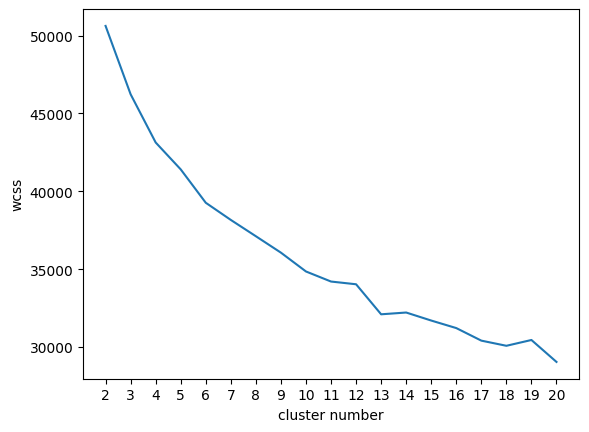

In [13]:
from matplotlib import pyplot as plt

plt.ylabel("wcss")
plt.xlabel("cluster number")
plt.xticks(range(2,21))
plt.plot(range(2,21), wcss)

In [16]:
# trecho adaptado do codigo feito por Jessica Temporal do podcast Pizza de Dados

from math import sqrt

def getOptimalClusterNum(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = len(wcss), wcss[-1]

    distances = []
    for index in range(len(wcss)):
        x0 = index + 2
        y0 = wcss[index]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)

        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2


In [17]:
optimal_cluster_num = getOptimalClusterNum(wcss)

optimal_cluster_num

6

aplicando um algoritmo de k means na base

In [8]:

clusters = KMeans(n_clusters=6).fit_predict(game_tag_data)
clusters

/home/gustavovilelamitraud/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 5, 0, 0], dtype=int32)

agora vamos testar o modelo

In [9]:
lookup_recomendation = {"game_name": [x.lower() for x in df_steam["name"]], "cluster": clusters}

In [10]:
import random

def get_recomendation(game, lookup):
    lookup = pd.DataFrame(lookup)
    cluster_to_recomend = int(lookup.loc[lookup["game_name"]==game]["cluster"])
    list_of_games = list(lookup.loc[lookup["cluster"]==cluster_to_recomend]["game_name"])
    return random.sample(list_of_games, 4)

get_recomendation("Rocket League®".lower(), lookup_recomendation)

/tmp/ipykernel_7103/2562130721.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cluster_to_recomend = int(lookup.loc[lookup["game_name"]==game]["cluster"])


['paintball war',
 'chernobyl vr project',
 "trianga's project: battle splash 2.0",
 'war operations']

Vamos aplicar a ideia de tags nas categorias genre e platforms

In [ ]:
games_genre_dict = createFlagDict(df_steam["genres"])
games_genre_dict

In [ ]:
games_platform_dict = createFlagDict(df_steam["platforms"])
games_platform_dict

In [13]:
game_platform_data = pd.DataFrame(games_platform_dict).transpose()
game_genre_data = pd.DataFrame(games_genre_dict).transpose()
print(game_platform_data,"\n\n")
print(game_genre_data)


         0  1  2
10       1  1  1
20       1  1  1
30       1  1  1
40       1  1  1
50       1  1  1
...     .. .. ..
1065230  0  0  1
1065570  0  0  1
1065650  0  0  1
1066700  0  1  1
1069460  0  1  1

[27075 rows x 3 columns] 


         0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24   
10        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0  \
20        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
30        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
40        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
50        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
1065230   0   0   1   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   
1065570   0   1   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1065650   0   1   0   0   0   1   0   0   0   0

In [14]:
games_flags = pd.concat([game_tag_data, game_platform_data, game_genre_data], axis=1)
games_flags

0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24   
10        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0  \
20        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
30        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
40        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
50        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
1065230   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1065570   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1065650   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1066700   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1069460   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

         25  26  27  28  
10        0   0   0   0  
20        0   0   0   0  
30        0   0   0   0  
40        0   0   0   0  
50        0   0   0   0  
...      ..  ..  ..  ..  
1065230   0   0   0   0  
1065570   0   0   0   0  
1065650   0   0   0   0  
1066700   0   0   0   0  
1069460   0   0   0   0  

[27075 rows x 371 columns]

Aplicando o algoritmo Kmeans nesse dataframe

In [15]:
clusters = KMeans(n_clusters=6).fit_predict(games_flags)
clusters

/home/gustavovilelamitraud/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 4, 2, ..., 1, 3, 3], dtype=int32)

In [16]:
lookup_recomendation = {"game_name": [x.lower() for x in df_steam["name"]], "cluster": clusters}

get_recomendation("Grand Theft Auto V".lower(), lookup_recomendation)

/tmp/ipykernel_7103/2562130721.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cluster_to_recomend = int(lookup.loc[lookup["game_name"]==game]["cluster"])


['angel light the elven truce', 'journey of johann', 'allergenium', 'canari']